In [16]:
import pandas as pd, numpy as np, sklearn 
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import ElasticNet


In [4]:
train = pd.read_csv('train_house.csv')
test = pd.read_csv('test_house.csv')

In [18]:
m_train = train.isnull().sum().sort_values(ascending = False)
percent = m_train / train.shape[0]
miss_data = pd.concat([m_train, percent], axis = 1, keys=['Missed', 'Percent'])
miss_data.head(20)

,Missed,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [22]:
m_test = test.isnull().sum().sort_values(ascending = False)
percent = m_test / train.shape[0]
miss_data = pd.concat([m_test, percent], axis = 1, keys=['Missed', 'Percent'])
miss_data.head(10)

,Missed,Percent
PoolQC,1456,0.997260
MiscFeature,1408,0.964384
Alley,1352,0.926027
Fence,1169,0.800685
FireplaceQu,730,0.500000
LotFrontage,227,0.155479
GarageYrBlt,78,0.053425
GarageQual,78,0.053425
GarageFinish,78,0.053425
GarageCond,78,0.053425


In [25]:
train['SalePrice'].skew()

1.8828757597682129

In [32]:
abs(train.corr()['SalePrice']).sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

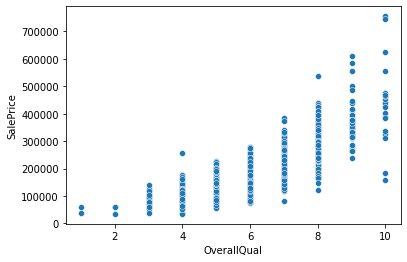

In [34]:
sns.scatterplot(data = train, x = 'OverallQual', y = 'SalePrice')

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

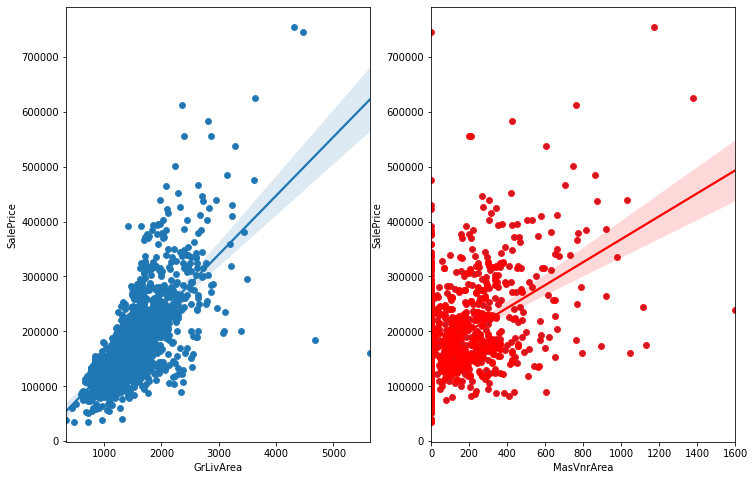

In [38]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2, color = 'red')

In [44]:
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)

In [52]:
miss_all = all_data.isna().sum()
percent = miss_all / all_data.shape[0]
pd.concat([miss_all, percent], keys = ["All", "Percent"], axis = 1).sort_values(by = "Percent",ascending = False)

,All,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
...,...,...
CentralAir,0,0.000000
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
LowQualFinSF,0,0.000000


In [54]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))


In [57]:
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [59]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

In [63]:
miss_all = all_data.isna().sum()
percent = miss_all / all_data.shape[0]
mm = pd.concat([miss_all, percent], keys = ["All", "Percent"], axis = 1).sort_values(by = "Percent",ascending = False)


In [67]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats]
skewed_feats.skew().sort_values(ascending = False)

MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.147456
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.932018
MasVnrArea        2.602589
OpenPorchSF       2.536417
WoodDeckSF        1.843380
LotFrontage       1.503278
1stFlrSF          1.470360
BsmtFinSF1        1.425722
GrLivArea         1.270010
TotalBsmtSF       1.162882
BsmtUnfSF         0.919824
2ndFlrSF          0.862118
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
HalfBath          0.694924
BsmtFullBath      0.624062
OverallCond       0.570605
BedroomAbvGr      0.326492
GarageArea        0.241301
OverallQual       0.197212
FullBath          0.167692
Id                0.000000
GarageCars       -0.218373
GarageYrBlt      -0.382150
YearRemodAdd     -0.451252
YearBuilt        -0.600114
dtype: float64

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

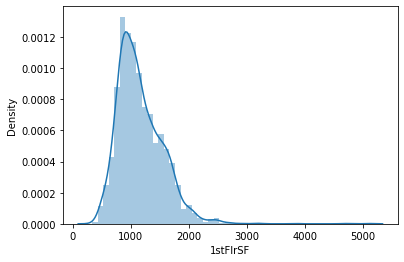

In [68]:
sns.distplot(all_data['1stFlrSF'])

In [69]:
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)

/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


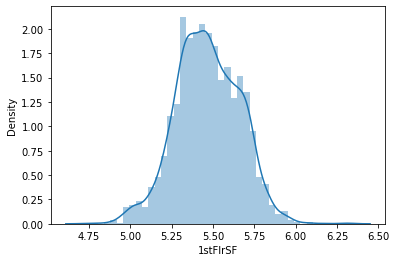

In [72]:
sns.distplot(all_data['1stFlrSF']);


In [73]:
all_data['TotalSF'] = (all_data['TotalBsmtSF'] 
                       + all_data['1stFlrSF'] 
                       + all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] 
                                 + all_data['BsmtFinSF2'] 
                                 + all_data['1stFlrSF'] 
                                 + all_data['2ndFlrSF']
                                )
                                 

all_data['Total_Bathrooms'] = (all_data['FullBath'] 
                               + (0.5 * all_data['HalfBath']) 
                               + all_data['BsmtFullBath'] 
                               + (0.5 * all_data['BsmtHalfBath'])
                              )
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] 
                              + all_data['3SsnPorch'] 
                              + all_data['EnclosedPorch'] 
                              + all_data['ScreenPorch'] 
                              + all_data['WoodDeckSF']
                             )

In [74]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [76]:
all_data.shape

(2919, 90)

In [77]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

In [82]:
final_features = pd.get_dummies(all_data)
final_features.shape

(2919, 322)

In [90]:
y = train['SalePrice']


In [91]:
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]

In [92]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])


In [97]:
counts = X.BsmtUnfSF.value_counts()
counts.iloc[0]

117

In [99]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [100]:
X.shape,y.shape, X_sub.shape

((1455, 321), (1455,), (1459, 321))

In [101]:
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

In [102]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((974, 321), (974,), (481, 321), (481,))

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [126]:
print ('%.2f'%mean_squared_error(y_test, y_pred))

2759686257469131906262788734976.00


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()

test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [136]:
lightgbm = lgb.LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [138]:
xgboost = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [142]:
lightgbm.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              feature_fraction=0.2, feature_fraction_seed=7, learning_rate=0.01,
              max_bin=200, n_estimators=5000, num_leaves=4,
              objective='regression', verbose=-1)

In [143]:
pred = lightgbm.predict(X_test)

In [148]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i, normalize=True)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [149]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.5: 1009320840.7615371
0.01: 1058371817.1451119
1: 1084554499.698978
0.001: 1093165659.2825491
0.0001: 1131399162.8257732
1.5: 1162868315.9035208
1e-05: 1201069875.623375
1e-15: 1226644071.3951266
1e-08: 1226915151.1407576
1e-10: 1226944647.3883946
2: 1239909953.7011008
3: 1388241642.0329912
4: 1529147512.8801126
5: 1663369768.2645526
10: 2251741771.601011
20: 3125347539.913428
30: 3735128676.981225
40: 4180969035.121085
-2: 56205270736.12981
-3: 247338485544.1561
-1: 308127862835.0747


In [161]:
cross_val_score(lightgbm, X, y, cv = 3)


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 w

array([0.9173635 , 0.87639301, 0.87270705])

In [208]:
lightgbm.fit(X,y)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              feature_fraction=0.2, feature_fraction_seed=7, learning_rate=0.01,
              max_bin=200, n_estimators=5000, num_leaves=4,
              objective='regression', verbose=-1)

In [209]:
pred = lightgbm.predict(X_sub)

In [210]:
pred
d = {"Id": X_sub["Id"], "SalePrice": pred}
df_lgb = pd.DataFrame(d)
df_lgb

,Id,SalePrice
1460,1461,127395.937927
1461,1462,163815.842857
1462,1463,183885.720580
1463,1464,191414.424403
1464,1465,196063.367200
...,...,...
2914,2915,83855.016901
2915,2916,78512.088857
2916,2917,167033.268719
2917,2918,121816.765117


In [207]:
model_xgb = xgb.XGBRegressor()
xgb_pred = model_xgb.fit(X, y)
#X.isna().sum().sort_values(ascending = False)

XGBoostError: [14:32:43] /Users/travis/build/dmlc/xgboost/src/data/data.cc:945: Check failed: valid: Input data contains `inf` or `nan`
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000123d6ade4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x0000000123dba4e4 unsigned long long xgboost::SparsePage::Push<xgboost::data::DenseAdapterBatch>(xgboost::data::DenseAdapterBatch const&, float, int) + 1140
  [bt] (2) 3   libxgboost.dylib                    0x0000000123de2780 xgboost::data::SimpleDMatrix::SimpleDMatrix<xgboost::data::DenseAdapter>(xgboost::data::DenseAdapter*, float, int) + 224
  [bt] (3) 4   libxgboost.dylib                    0x0000000123db9c1f xgboost::DMatrix* xgboost::DMatrix::Create<xgboost::data::DenseAdapter>(xgboost::data::DenseAdapter*, float, int, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, unsigned long) + 127
  [bt] (4) 5   libxgboost.dylib                    0x0000000123d5de7a XGDMatrixCreateFromMat_omp + 122
  [bt] (5) 6   libffi.dylib                        0x00007fff71623905 ffi_call_unix64 + 85
  [bt] (6) 7   ???                                 0x00007ffee41b5660 0x0 + 140732725417568



In [221]:
lasso = Lasso()
elasticnet = ElasticNet(random_state=0)

In [211]:
d2 = {"Id": test["Id"], "SalePrice": xgb_pred}
df_xgb = pd.DataFrame(d2)
df_xgb

NameError: name 'xgb_pred' is not defined

In [228]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, lightgbm),
                                meta_regressor=lightgbm,
                                use_features_in_secondary=True)

In [229]:
stack_gen.fit(X, y)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254608890732.79437, tolerance: 723352051.6734959
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250142499767.20322, tolerance: 757818681.6895827
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229295859964.2881, tolerance: 700084146.7190237
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective d

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 w

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317332293724.22516, tolerance: 916383181.8730122
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 964686060618.5564, tolerance: 916383181.8730122
  model = cd_fast.enet_coordinate_descent(


StackingCVRegressor(meta_regressor=LGBMRegressor(bagging_fraction=0.75,
                                                 bagging_freq=5, bagging_seed=7,
                                                 feature_fraction=0.2,
                                                 feature_fraction_seed=7,
                                                 learning_rate=0.01,
                                                 max_bin=200, n_estimators=5000,
                                                 num_leaves=4,
                                                 objective='regression',
                                                 verbose=-1),
                    regressors=(Ridge(alpha=40, normalize=True), Lasso(),
                                ElasticNet(random_state=0),
                                LGBMRegressor(bagging_fraction=0.75,
                                              bagging_freq=5, bagging_seed=7,
                                              feature_fraction=0.2,
     

In [248]:
X_sub.isna().sum().sort_values(ascending = False)

GarageYrBlt              78
BsmtHalfBath              2
BsmtFullBath              2
Total_Bathrooms           2
BsmtUnfSF                 1
                         ..
Condition1_RRNe           0
Condition1_RRAn           0
Condition1_RRAe           0
Condition1_PosN           0
SaleCondition_Partial     0
Length: 320, dtype: int64

In [247]:
X_sub.BsmtHalfBath = X_sub.BsmtHalfBath.fillna(X_sub.BsmtHalfBath.mode())

In [212]:
df_lgb.to_csv('lgb.csv', index = False)

In [ ]:
df_xgb.to_csv('xgb.csv', index = False)

In [213]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f lgb.csv -m "Message"

100%|██████████████████████████████████████| 33.6k/33.6k [00:03<00:00, 10.5kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [1]:
y

NameError: name 'y' is not defined

In [71]:
import pandas as pd
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

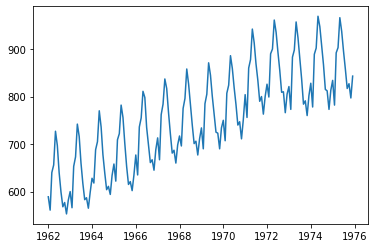

In [72]:
plt.plot(milk)
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk)


In [73]:
de = milk.index.days_in_month
new_milk = np.array(milk['milk'].tolist()) / de
new_milk = np.round(new_milk, 4)

In [74]:
milk['milk'] = new_milk

In [75]:
milk['milk'].sum(axis = 0)

4166.3265

In [76]:
round(4166.3265,2)

4166.33

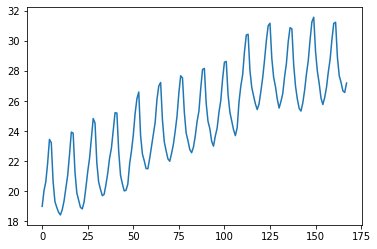

In [78]:
plt.plot(new_milk)

In [85]:
milk['daily_diff1'] = milk.milk - milk.milk.shift(1)


In [96]:
#milk2 = milk.dropna()
#milk2.drop('milk', axis = 1, inplace = True)
milk2

,daily_diff1
month,
1962-02-01,1.0357
1962-03-01,0.6095
1962-04-01,1.2215
1962-05-01,1.5849
1962-06-01,-0.2183
...,...
1975-08-01,-1.2258
1975-09-01,-0.4441
1975-10-01,-0.5559


In [114]:
sm.tsa.stattools.adfuller(milk4)


(-5.481169398767332,
 2.2825961357667207e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.903141079556008)

In [101]:
#milk['daily_diff12'] = milk.milk - milk.milk.shift(12)
milk3 = milk.drop(['milk', 'daily_diff1'], axis = 1)

In [109]:
#milk3.dropna(inplace = True)
sm.tsa.stattools.adfuller(milk3)
milk['2diffs'] = milk.daily_diff12 - milk.daily_diff12.shift(1)

In [113]:
milk4 = milk.drop(['milk', 'daily_diff1', 'daily_diff12'], axis = 1)
milk4.dropna(inplace =True)

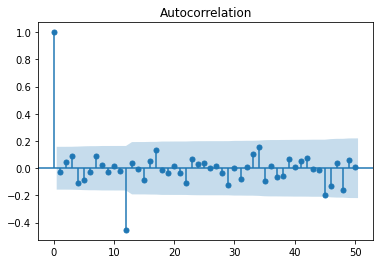

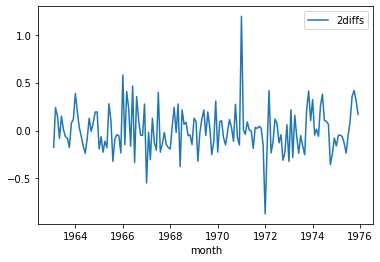

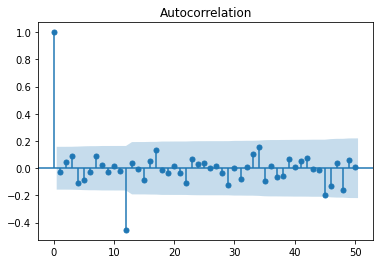

In [123]:
sns.lineplot(data = milk4)
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk4.values.squeeze(), lags=50)

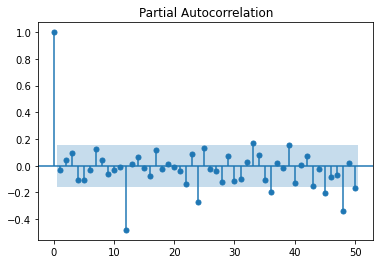

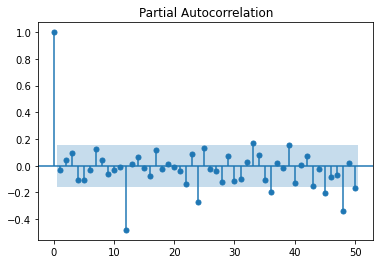

In [126]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk4.values.squeeze(), lags=50)

In [139]:
from scipy.optimize import minimize

fun = lambda x: (x - 1)**2 
minimize(fun, [21341243], method='BFGS')


      fun: 8.26321798823304e-13
 hess_inv: array([[0.49999958]])
      jac: array([1.83294604e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 5
     njev: 17
   status: 0
  success: True
        x: array([1.00000091])